In [4]:
#Import the requred libarries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean,std
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import RepeatedStratifiedKFold
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore",category=FutureWarning)


In [5]:
#loading the data into pandas
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")


In [6]:
train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
#check the features information
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
#check null values on the data
train_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
test_dataset.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
train_dataset.shape

(614, 13)

In [13]:
test_dataset.shape

(367, 12)

In [14]:
#Handling the missing data
train_dataset = train_dataset.dropna(subset=['Gender',"Married","LoanAmount","Loan_Amount_Term"])
train_dataset['Dependents'].fillna(train_dataset['Dependents'].mode()[0],inplace=True)
train_dataset["Self_Employed"].fillna(train_dataset['Self_Employed'].mode()[0],inplace= True)
train_dataset["Credit_History"].fillna(train_dataset['Credit_History'].mode()[0],inplace = True)
test_dataset = test_dataset.dropna(subset=['Gender',"Married","LoanAmount","Loan_Amount_Term"])
test_dataset['Dependents'].fillna(test_dataset['Dependents'].mode()[0],inplace = True)
test_dataset['Self_Employed'].fillna(test_dataset['Self_Employed'].mode()[0],inplace = True)
test_dataset['Credit_History'].fillna(test_dataset['Credit_History'].mode()[0],inplace = True)

train_dataset['Total_income'] = train_dataset['ApplicantIncome'] + train_dataset['CoapplicantIncome']
test_dataset['Total_income'] = test_dataset['ApplicantIncome'] + test_dataset['CoapplicantIncome']

In [15]:
train_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_income         0
dtype: int64

In [16]:
test_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_income         0
dtype: int64

In [17]:
train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [18]:
def outlier_remover(dataset,column):
  q1 = dataset[column].quantile(0.25)
  q3 = dataset[column].quantile(0.75)

  iqr = q3 -q1

  dataset.drop(dataset[(dataset[column] < (q1-1.5 * iqr)) | (dataset[column] > (q3 +1.5*iqr))].index,inplace = True)
  return dataset
outlier_remover(train_dataset,'Total_income')
outlier_remover(test_dataset,'Total_income')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,5786
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4867
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,5243
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,7393


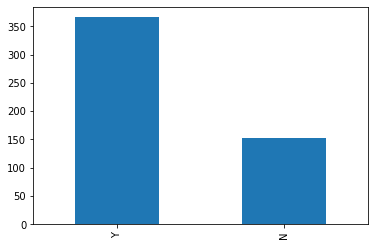

In [19]:
train_dataset['Loan_Status'].value_counts().plot.bar()
plt.show()

In [20]:
#Perfrom category enecoding and replacing with numbers
def replacer_category(points,data,items):
  for i in range(0, points):
    train_dataset.replace(items[i],i,inplace=True)
    test_dataset.replace(items[i],i,inplace=True)

  return

In [21]:
def percentage_calculate(data1,data2):
  percentage = (data1/data2) * 100

  return percentage

  #calculate the percenatge upon calling

In [27]:
from ast import Return
def difference_plotter(points,data,plt_title,plt_diff,items):
      train_dataset[data].value_counts().plot.bar(title = plt_title)
      percenatge_parroval = []

      relevance = 0

      replacer_category(points,data,items)
      for i in range(0,points):
        x = train_dataset[data][(train_dataset['Loan_Status'] == 'Y')].value_counts()[i]
        y = train_dataset[data].value_counts()[i]

        percenatge_parroval.insert(i,percentage_calculate(x,y))
        print("Percenatge of loan Aproved  of ", plt_diff[i], ":->",int(percenatge_parroval[i]),"%")

      for i in range(0,points -1):

        relevance = percenatge_parroval[i] - percenatge_parroval[i+1]

        if relevance >= 0:
          temp = plt_diff[i]

        else:
          temp = plt_diff[i+1]
          relevance = relevance * -1

        if relevance >= 10:
          conclusion = 'Which is high and more shlould be',temp,'In order to higher the chances of getting the loan approved'
        if (relevance < 10) & (relevance >=5):
          conclusion = 'Which is avarege and is not mandototy ', temp," In order to higher the chances of getting the loan approved"
        if relevance <= 5:
          conclusion ='Which is low and completely optional that one should be', temp
        print("The difference in loan Approvals is :-> ",int(relevance),"%",conclusion)
      plt.show()
      return
    



Percenatge of loan Aproved  of  Male :-> 71 %
Percenatge of loan Aproved  of  Female :-> 65 %
The difference in loan Approvals is :->  6 % ('Which is avarege and is not mandototy ', 'Male', ' In order to higher the chances of getting the loan approved')


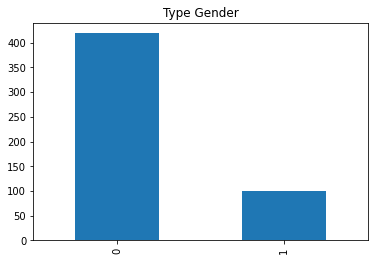

In [28]:
difference_plotter(2,'Gender','Type Gender',['Male','Female'],['Male','Female'])
# difference_plotter(2, 'Gender','Type of Gender',['Male', 'Female'], ['Male', 'Female'])

Percenatge of loan Aproved  of  Graduated :-> 72 %
Percenatge of loan Aproved  of  Ungraduated :-> 63 %
The difference in loan Approvals is :->  9 % ('Which is avarege and is not mandototy ', 'Graduated', ' In order to higher the chances of getting the loan approved')


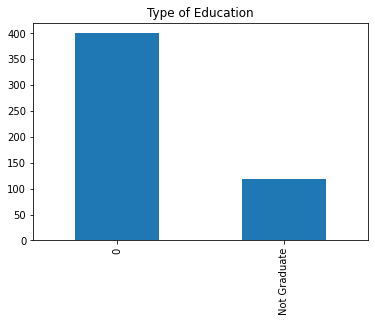

In [31]:
# base on gender
difference_plotter(2,'Education','Type of Education', ['Graduated','Ungraduated'],['Graduate','Not Graduate'])

Percenatge of loan Aproved  of  Self Employed :-> 63 %
Percenatge of loan Aproved  of  Emplyed by others :-> 71 %
The difference in loan Approvals is :->  8 % ('Which is avarege and is not mandototy ', 'Emplyed by others', ' In order to higher the chances of getting the loan approved')


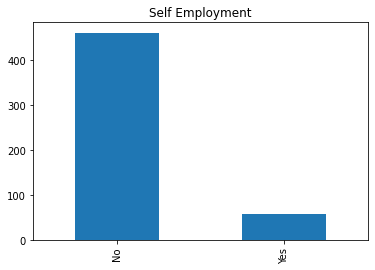

In [34]:
difference_plotter(2,'Self_Employed','Self Employment',['Self Employed','Emplyed by others'],['Yes','No'])

Percenatge of loan Aproved  of  Married :-> 74 %
Percenatge of loan Aproved  of  Unmarried :-> 64 %
The difference in loan Approvals is :->  9 % ('Which is avarege and is not mandototy ', 'Married', ' In order to higher the chances of getting the loan approved')


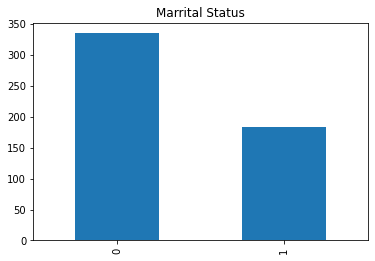

In [35]:
difference_plotter(2,'Married','Marrital Status',['Married','Unmarried'],['Yes','No'])

Percenatge of loan Aproved  of  1 Dependents :-> 69 %
Percenatge of loan Aproved  of  2 Dependents :-> 67 %
Percenatge of loan Aproved  of  3 Dependents :-> 77 %
Percenatge of loan Aproved  of  3 + Dependents :-> 71 %
The difference in loan Approvals is :->  2 % ('Which is low and completely optional that one should be', '1 Dependents')
The difference in loan Approvals is :->  10 % ('Which is high and more shlould be', '3 Dependents', 'In order to higher the chances of getting the loan approved')
The difference in loan Approvals is :->  6 % ('Which is avarege and is not mandototy ', '3 Dependents', ' In order to higher the chances of getting the loan approved')


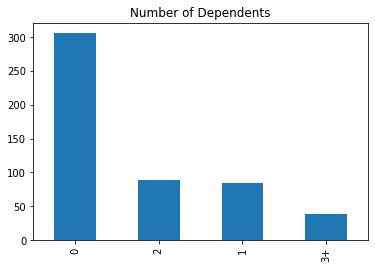

In [36]:
difference_plotter(4,'Dependents','Number of Dependents',['1 Dependents','2 Dependents','3 Dependents','3 + Dependents'],['0','1','2','3+'])

Percenatge of loan Aproved  of  Non Credit History :-> 8 %
Percenatge of loan Aproved  of  Credit History :-> 80 %
The difference in loan Approvals is :->  71 % ('Which is high and more shlould be', 'Credit History', 'In order to higher the chances of getting the loan approved')


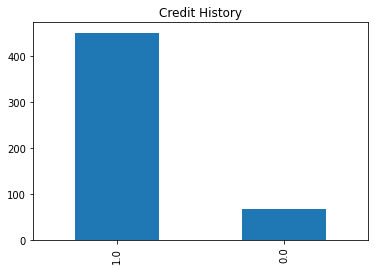

In [37]:
difference_plotter(2,'Credit_History', 'Credit History',["Non Credit History",'Credit History'],['1','0'])

Percenatge of loan Aproved  of  Rural :-> 63 %


KeyError: ignored

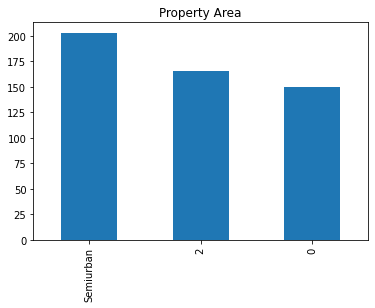

In [42]:
difference_plotter(3,'Property_Area','Property Area',['Rural','Semi-Urban','Urban'],['Rural','Semi-Urban','Urban'])

Percenatge of loan Aproved  of  Rural :-> 63 %
Percenatge of loan Aproved  of  Semi-Urban :-> 77 %
Percenatge of loan Aproved  of  Urban :-> 69 %
The difference in loan Approvals is :->  14 % ('Which is high and more shlould be', 'Semi-Urban', 'In order to higher the chances of getting the loan approved')
The difference in loan Approvals is :->  8 % ('Which is avarege and is not mandototy ', 'Semi-Urban', ' In order to higher the chances of getting the loan approved')


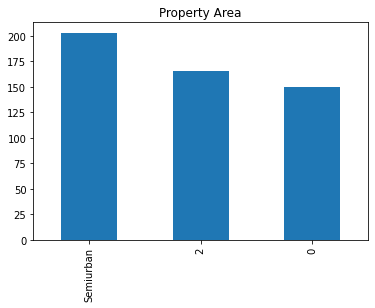

In [43]:
difference_plotter(3, 'Property_Area', 'Property Area', ['Rural', 'Semi-Urban', 'Urban'], ['Rural', 'Semiurban', 'Urban'])

In [44]:
#Histogram diagram
def history_making(data):
  train_dataset[data].hist(bins=50)
  print(f'Media value of : {data} is {train_dataset[data].median()}')
  plt.show()
  return 

Media value of : ApplicantIncome is 3675.5


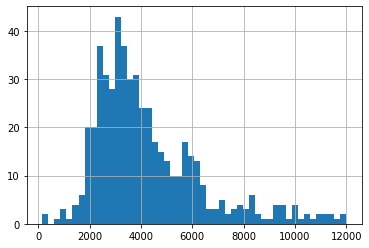

In [47]:
#make the diagram on income
history_making('ApplicantIncome')

Media value of : CoapplicantIncome is 1250.0


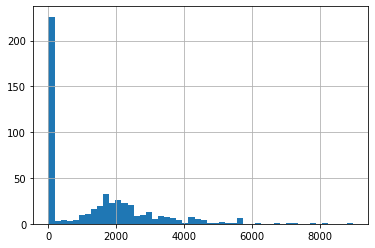

In [48]:
#histogram on coapplicant icome
history_making('CoapplicantIncome')

Media value of : LoanAmount is 125.0


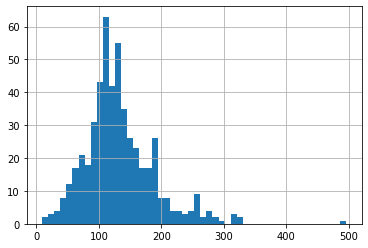

In [49]:
#load amount
history_making("LoanAmount")